# <a id='toc1_'></a>[Loan Default Prediction (Training)](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Loan Default Prediction (Training)](#toc1_)    
  - [Libraries](#toc1_1_)    
  - [Global preferences](#toc1_2_)    
  - [Read Preprocessed data](#toc1_3_)    
    - [Transform](#toc1_3_1_)    
      - [Scaler](#toc1_3_1_1_)    
      - [Oversampling](#toc1_3_1_2_)    
  - [Train](#toc1_4_)    
    - [Logistic regression](#toc1_4_1_)    
    - [Optimization](#toc1_4_2_)    
      - [RFE](#toc1_4_2_1_)    
      - [Hiperparámeter optimization](#toc1_4_2_2_)    
  - [Evaluación](#toc1_5_)    
    - [Train](#toc1_5_1_)    
    - [Validation](#toc1_5_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Libraries](#toc0_)

In [25]:
# Basic python
import numpy as np
from collections import Counter
import pickle

# Data manipulation
import pandas as pd
import datetime as dt

# Visualization
import matplotlib.pyplot as plt

# Transform
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.metrics import classification_report


# Optimization
from sklearn.feature_selection import RFE,  RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.pipeline import Pipeline

## <a id='toc1_2_'></a>[Global preferences](#toc0_)

In [35]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (18,10)

## <a id='toc1_3_'></a>[Read Preprocessed data](#toc0_)

In [8]:
# Define file path
train_path = "../data/train/"
val_path = "../data/validation/"
X_train_file = "x_train_file.csv"
y_train_file = "y_train_file.csv"
X_val_file = "x_val_file.csv"
y_val_file = "y_val_file.csv"

In [9]:
# Read data
X_train = pd.read_csv(train_path + X_train_file)
y_train = pd.read_csv(train_path + y_train_file)
X_val = pd.read_csv(val_path + X_val_file)
y_val = pd.read_csv(val_path + y_val_file)


### <a id='toc1_3_1_'></a>[Transform](#toc0_)

#### <a id='toc1_3_1_1_'></a>[Scaler](#toc0_)

In [10]:
#Scale feature values using robust scaler in order to deal with outliers.
Scaler = RobustScaler()
Scaler.fit(X_train)

X_train.loc[:,:] =Scaler.transform(X_train)
X_val.loc[:,:] =Scaler.transform(X_val)

In [11]:
# # Scale feature values using robust scaler in order to deal with outliers.
# Min_Scaler = MinMaxScaler()
# Min_Scaler.fit(X_train)

# X_train.loc[:,:] = Min_Scaler.transform(X_train)
# X_val.loc[:,:] = Min_Scaler.transform(X_val)

#### <a id='toc1_3_1_2_'></a>[Oversampling](#toc0_)

In [12]:

#X_train, y_train = SMOTE().fit_resample(X_train, y_train)
#X_train, y_train = ADASYN(sampling_strategy=.38).fit_resample(X_train, y_train)
#X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print(sorted(Counter(y_train).items()))

[('default', 1)]


## <a id='toc1_4_'></a>[Train](#toc0_)

### <a id='toc1_4_1_'></a>[Logistic regression](#toc0_)

Logistic regression is a Machine Learning model well behaved for binary classification that supports custom weights for handling unbalanced data. As this uses euclidean metric, data must be scaled.

The mathematical expression with a linear kernel is 

\begin{equation}
f(x) = \dfrac{1}{1 + e^{-(\beta_{0}+ \sum_{i=0}^{n}(\beta_{i}x_{i} )} }
\end{equation}

for $n$ features.
For finding the best parameters an optimization must be performed, usually following gradient descent algorithm. 

\begin{equation}
f(x_{k+1}) = f(x_{k})+ \alpha_{k}*p_{k}
\end{equation}

where $\alpha$ is the step size and $p_{k}$ is the direction of descent. To choose optimal step size, several approaches were developed as conjugated gradient, BFGS, etc.

In [13]:
#weights = X_train.shape[0]/(2 * np.bincount(y_train.to_numpy().ravel().astype(int)))

In [14]:
# clf = LogisticRegression(random_state=1, max_iter=1000, C=1, class_weight= "balanced")
# clf.fit(X_train, y_train.to_numpy().ravel())

# y_pred_train = clf.predict(X_train)
# y_pred_val = clf.predict(X_val)

### <a id='toc1_4_2_'></a>[Optimization](#toc0_)

#### <a id='toc1_4_2_1_'></a>[RFE](#toc0_)

In [15]:
#selector = RFE(clf, step=1)
#selector = selector.fit(X_train, y_train.to_numpy().ravel())
# y_pred_train = selector.predict(X_train)
# y_pred_val = selector.predict(X_val)
# len(selector.get_feature_names_out()), selector.get_feature_names_out()[0:5]

#### <a id='toc1_4_2_2_'></a>[Hiperparámeter optimization](#toc0_)

In [ ]:
# # Define the classifier
# clf = RandomForestClassifier(random_state=42, class_weight="balanced")

# Logistic regression classifier
clf = LogisticRegression(random_state=42, max_iter=1000)

# # Define the feature selector
# rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(10), scoring='roc_auc')
selector = RFE(clf, step=1)

# Create a pipeline

pipeline = Pipeline([
    ('feature_selection', selector),
    ('classification', clf)
])

# Define the parameter grid
param_grid = {
    'classification__penalty': ["l1", "l2", None],
    'classification__solver': ["liblinear", "lbfgs" , "newton-cg"],
    'classification__class_weight' : ["balanced", None],
    'classification__C' : [0.1, 0.5, 1, 1.5, 2, 2.5, 3],
}

# parameters = [{"penalty": ["l1", "l2"], "solver": ["liblinear"], "class_weight" : ["balanced", None]},
#               {"penalty": ["l2", 'none'], "solver": ["lbfgs"], "class_weight" : ["balanced", "None"]}]

# Define the GridSearchCV algorithm
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=StratifiedKFold(10), scoring='roc_auc', n_jobs=-1)

# Fit the models
grid_search.fit(X_train,  y_train.to_numpy().ravel())

# Get the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Predict 
y_pred_train = grid_search.predict(X_train)
y_train_proba = grid_search.predict_proba(X_train)[:, 1]
y_pred_val = grid_search.predict(X_val)
y_val_proba = grid_search.predict_proba(X_val)[:, 1]


## <a id='toc1_5_'></a>[Evaluación](#toc0_)

### <a id='toc1_5_1_'></a>[Train](#toc0_)

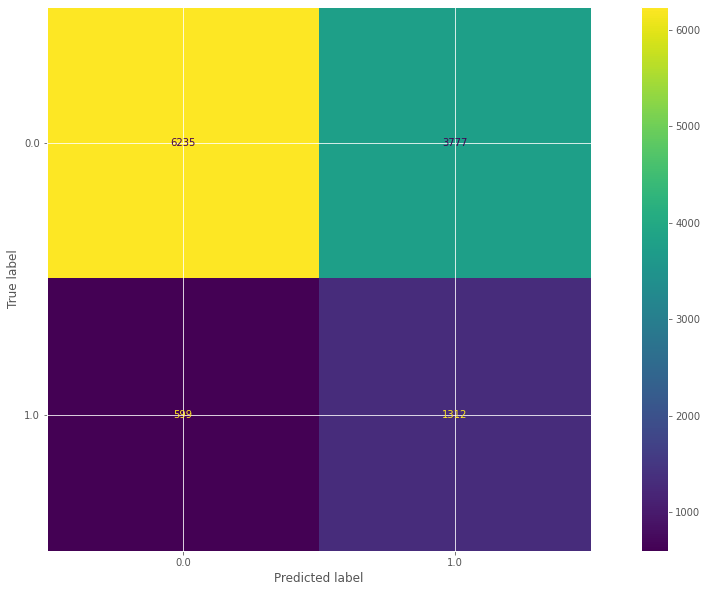

In [36]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)

In [37]:
roc_auc_score(y_train,y_pred_train)

0.654652120229142

In [38]:
print(classification_report(y_train, y_pred_train, target_names=["False", "True"]))

              precision    recall  f1-score   support

       False       0.91      0.62      0.74     10012
        True       0.26      0.69      0.37      1911

    accuracy                           0.63     11923
   macro avg       0.59      0.65      0.56     11923
weighted avg       0.81      0.63      0.68     11923



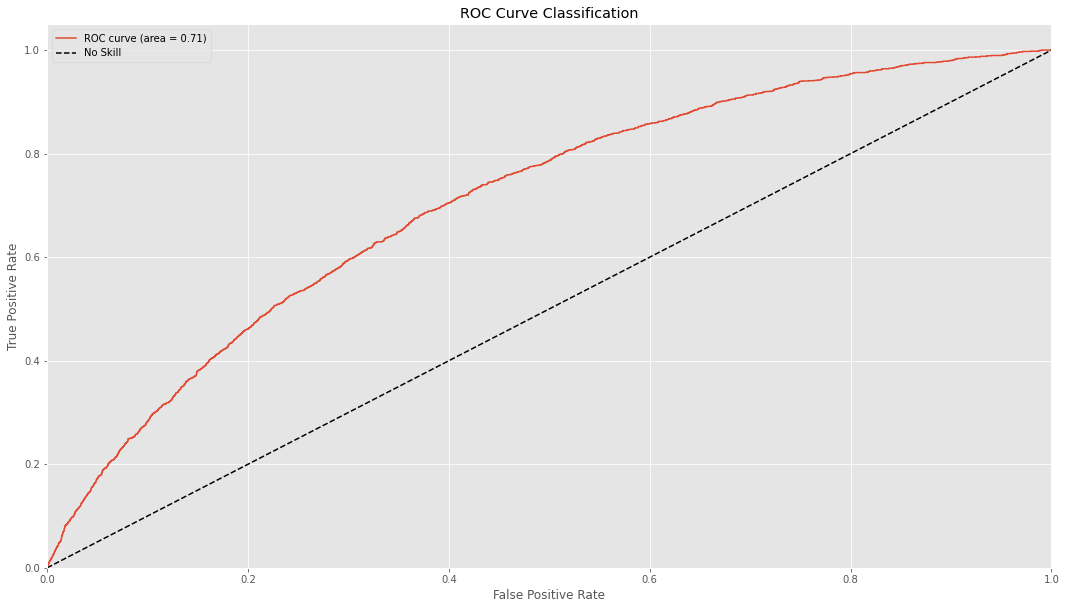

In [39]:
# Calculate ROC curve
#y_train_proba = selector.predict_proba(X_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train.to_numpy().ravel(), y_train_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Classification')
plt.legend()
plt.show()

### <a id='toc1_5_2_'></a>[Validation](#toc0_)

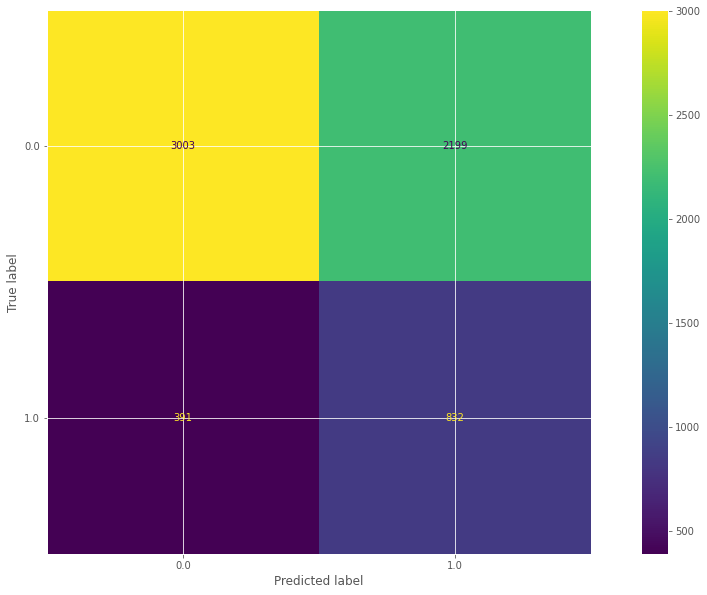

In [40]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [41]:
roc_auc_score(y_val, y_pred_val)

0.6287861640736329

In [42]:
print(classification_report(y_val, y_pred_val, target_names=["False", "True"]))

              precision    recall  f1-score   support

       False       0.88      0.58      0.70      5202
        True       0.27      0.68      0.39      1223

    accuracy                           0.60      6425
   macro avg       0.58      0.63      0.54      6425
weighted avg       0.77      0.60      0.64      6425



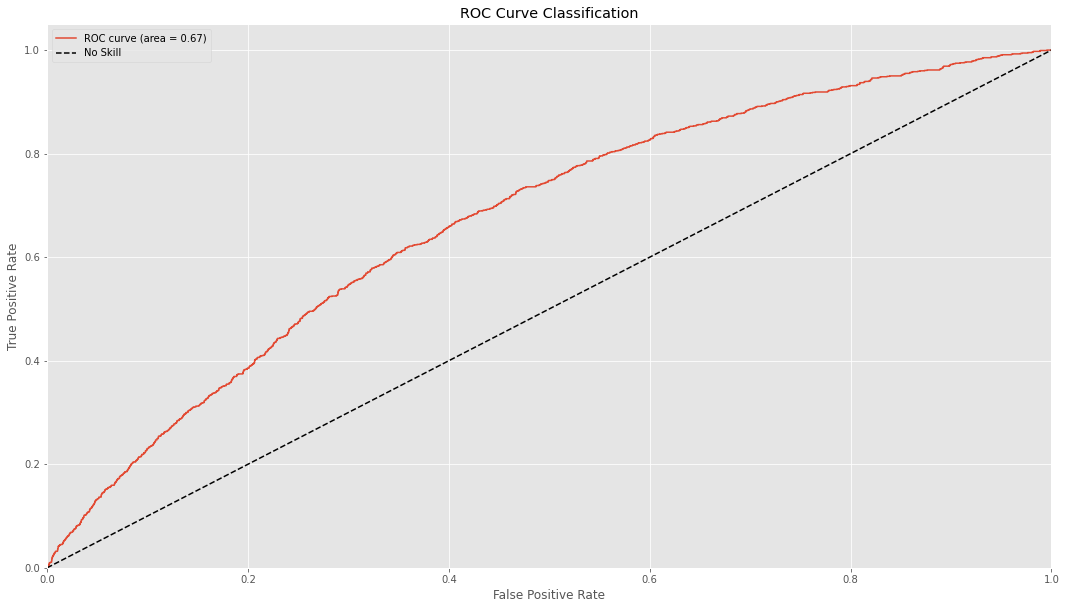

In [43]:
# Calculate ROC curve


fpr, tpr, thresholds = roc_curve(y_val.to_numpy().ravel(), y_val_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Classification')
plt.legend()
plt.show()

## Save model

In [51]:
# save the model to disk
filename = '../models/finalized_model.pkl'
pickle.dump(grid_search, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [52]:
loaded_model

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('feature_selection',
                                        RFE(estimator=LogisticRegression(max_iter=1000,
                                                                         random_state=42))),
                                       ('classification',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'classification__C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3],
                         'classification__class_weight': ['balanced', None],
                         'classification__penalty': ['l1', 'l2', None],
                         'classification__solver': ['liblinear', 'lbfgs',
                                                    'newton-cg']},
             scoring='roc_auc')